# **PORTOFOLIO**
## **Pengolahan Citra Digital**

Nama : Ferdyan Rahmadani Adhi Pramudya
</br>
NIM  : 22030224024

Saving WhatsApp Image 2024-04-09 at 19.52.08_4aa825b0.jpg to WhatsApp Image 2024-04-09 at 19.52.08_4aa825b0 (1).jpg


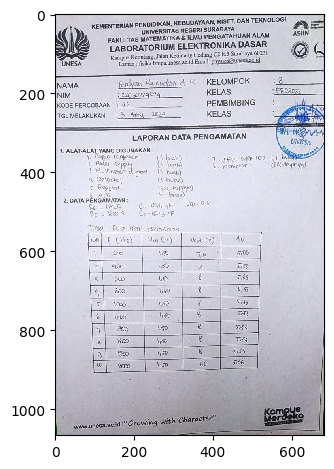

In [ ]:
from google.colab import files
from skimage import io

uploaded = files.upload()

filename1 = list(uploaded.keys())[0]
with open(filename1, 'wb') as f:
    f.write(uploaded[filename1])

img = io.imread(filename1)

io.imshow(img)
io.show()


### **Otsu Thresholding**
*Parameters:*
</br>
-> source: Input Image array (must be in Grayscale).
</br>
-> thresholdValue: Value of Threshold below and above which pixel values will change accordingly.
</br>
-> maxVal: Maximum value that can be assigned to a pixel.
</br>
-> thresholdingTechnique: The type of thresholding to be applied.

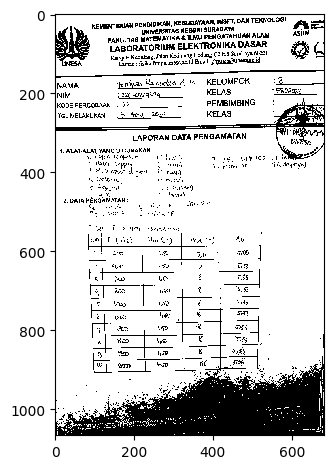

In [ ]:
import cv2
import numpy as np
from skimage import io

image1 = cv2.imread(filename1)

img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY +
											cv2.THRESH_OTSU)

thresh1_uint8 = thresh1.astype(np.uint8)

io.imshow(thresh1_uint8)
io.show()


### **Otsu Thresholding + Morphological Operation**

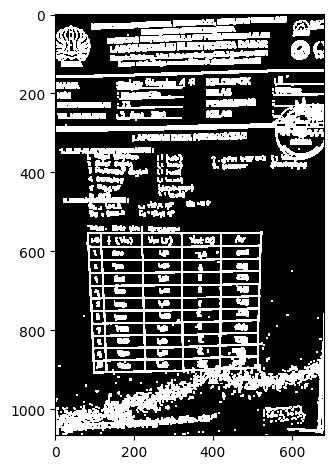

In [ ]:
from skimage import io
import cv2
import numpy as np

image = cv2.imread(filename1)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = np.ones((5, 5), np.uint8)

gradient = cv2.morphologyEx(thresh, cv2.MORPH_GRADIENT, kernel)

io.imshow(gradient)
io.show()


### **Denoising of Colored Images Using OpenCV**
Denoising sebuah gambar merujuk pada proses rekonstruksi sinyal dari gambar yang bernoise. Denoising dilakukan untuk menghilangkan noise yang tidak diinginkan dari gambar agar dapat dianalisis dalam bentuk yang lebih baik. Ini merujuk pada salah satu tahap pra-pemrosesan utama. Ada empat fungsi di OpenCV yang digunakan untuk denoising gambar yang berbeda.

</br>

**Syntax**: cv2.fastNlMeansDenoisingColored( P1, P2, float P3, float P4, int P5, int P6)

</br>

**Parameters:**
</br>
P1 – Source Image Array
</br>
P2 – Destination Image Array
</br>
P3 – Size in pixels of the template patch that is used to compute weights.
</br>
P4 – Size in pixels of the window that is used to compute a weighted average for the given pixel.
</br>
P5 – Parameter regulating filter strength for luminance component.
</br>
P6 – Same as above but for color components // Not used in a grayscale image.

Saving Screenshot 2024-04-09 202319.png to Screenshot 2024-04-09 202319.png


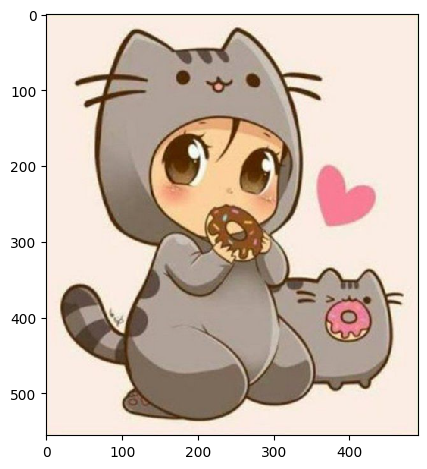

In [ ]:
from google.colab import files
from skimage import io

uploaded = files.upload()

filename2 = list(uploaded.keys())[0]
with open(filename2, 'wb') as f:
    f.write(uploaded[filename2])

img = io.imread(filename2)

io.imshow(img)
io.show()


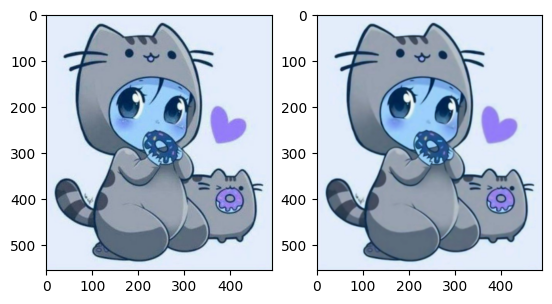

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread(filename2)

dst = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 5, 5)

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)

plt.show()



Syntax 'dst' = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 5, 5) digunakan untuk menerapkan denoising pada gambar berwarna menggunakan metode Fast Non-local Means Denoising.

### **Real-Time Edge Detection using OpenCV in Python | Canny edge detection method**

**Step 1: Noise Reduction**
</br>
Pertama, noise dalam gambar dikurangi dengan cara memperhalus gambar. Untuk memperhalus gambar gunakan filter Gaussian. Filter ini menerapkan rata-rata tertimbang pada setiap piksel, yang mengurangi sensitivitas terhadap perubahan kecil dalam intensitas yang disebabkan oleh kebisingan. Semakin besar ukuran kernel, semakin signifikan efek pelembutan yang dihasilkan. Rumus untuk kernel Gaussian 2D diberikan oleh:

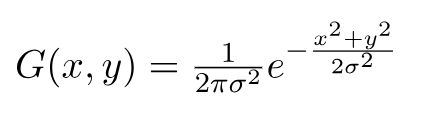

**Step 2: Finding the intensity gradient**
</br>
Pada langkah ini, gradien intensitas gambar dihitung, yang membantu dalam menemukan area pergeseran intensitas tiba-tiba yang sesuai dengan tepi dalam gambar. Teknik yang dikenal sebagai algoritma Sobel digunakan untuk menghitung turunan pertama dari gambar dalam arah horizontal (Gx) dan vertikal (Gy). Gradien horizontal (Gx) dan gradien vertikal (Gy) diberikan oleh operasi konvolusi berikut:
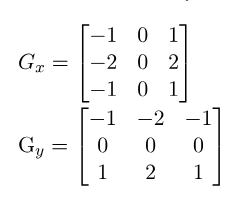

Dengan mengikuti persamaan-persamaan berikut dapat digunakan untuk menghitung intensitas gradien (G) dan arah (θ) pada setiap piksel:
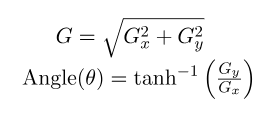

Arah gradien selalu akan tegak lurus terhadap tepi.

**Step 3: Non-maximum Suppression**
Gunakan metode penekanan non-maksimum untuk mendapatkan tepi yang tipis. Setiap piksel diperiksa dalam arah gradien untuk melihat apakah ada maksimum lokal. Jika tidak ada, piksel tersebut ditekan (nilainya diatur menjadi 0) karena kemungkinan besar bukan merupakan bagian dari tepi.

**Step 4: Hysteresis Thresholding**
Hysteresis thresholding digunakan untuk menyelesaikan tepi. Kami menetapkan nilai ambang minVal dan maxVal. Piksel dengan magnitudo gradien di atas maxVal dianggap sebagai tepi kuat, sementara yang di bawah minVal dianggap sebagai bukan tepi dan dibuang. Piksel dengan magnitudo antara minVal dan maxVal dianggap sebagai tepi lemah.
Untuk mengidentifikasi tepi akhir, kami mengikuti tepi kuat dan mempertimbangkan tepi lemah yang terhubung dengan mereka sebagai bagian dari tepi. Jika tepi lemah tidak terhubung ke tepi kuat apa pun, itu dibuang sebagai noise.



In [ ]:
import cv2

def canny_edge_detection(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(src=gray, ksize=(3, 3), sigmaX=0)

    edges = cv2.Canny(blurred, 70, 135)

    return blurred, edges

def main():
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print('Error: Failed to open camera.')
        return

    while True:
        ret, frame = cap.read()
        if not ret:
            print('Error: Failed to capture frame.')
            break

        blurred, edges = canny_edge_detection(frame)

        cv2.imshow("Blurred", blurred)
        cv2.imshow("Edges", edges)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


Koding tersebut menggunakan kamera untuk mendeteksi tepi dalam citra secara real-time menggunakan algoritma Canny. Prosesnya dimulai dengan mengambil frame citra dari kamera, kemudian mengonversinya ke citra skala abu-abu yang diperlukan untuk deteksi tepi. Selanjutnya, algoritma Canny diterapkan pada citra skala abu-abu untuk menghasilkan citra tepi. Hasil deteksi tepi ditampilkan dalam jendela, dan program akan berjalan hingga tombol 'q' ditekan untuk keluar. Ini adalah cara yang umum digunakan untuk mengamati deteksi tepi dalam citra secara real-time.

Output :

</br>

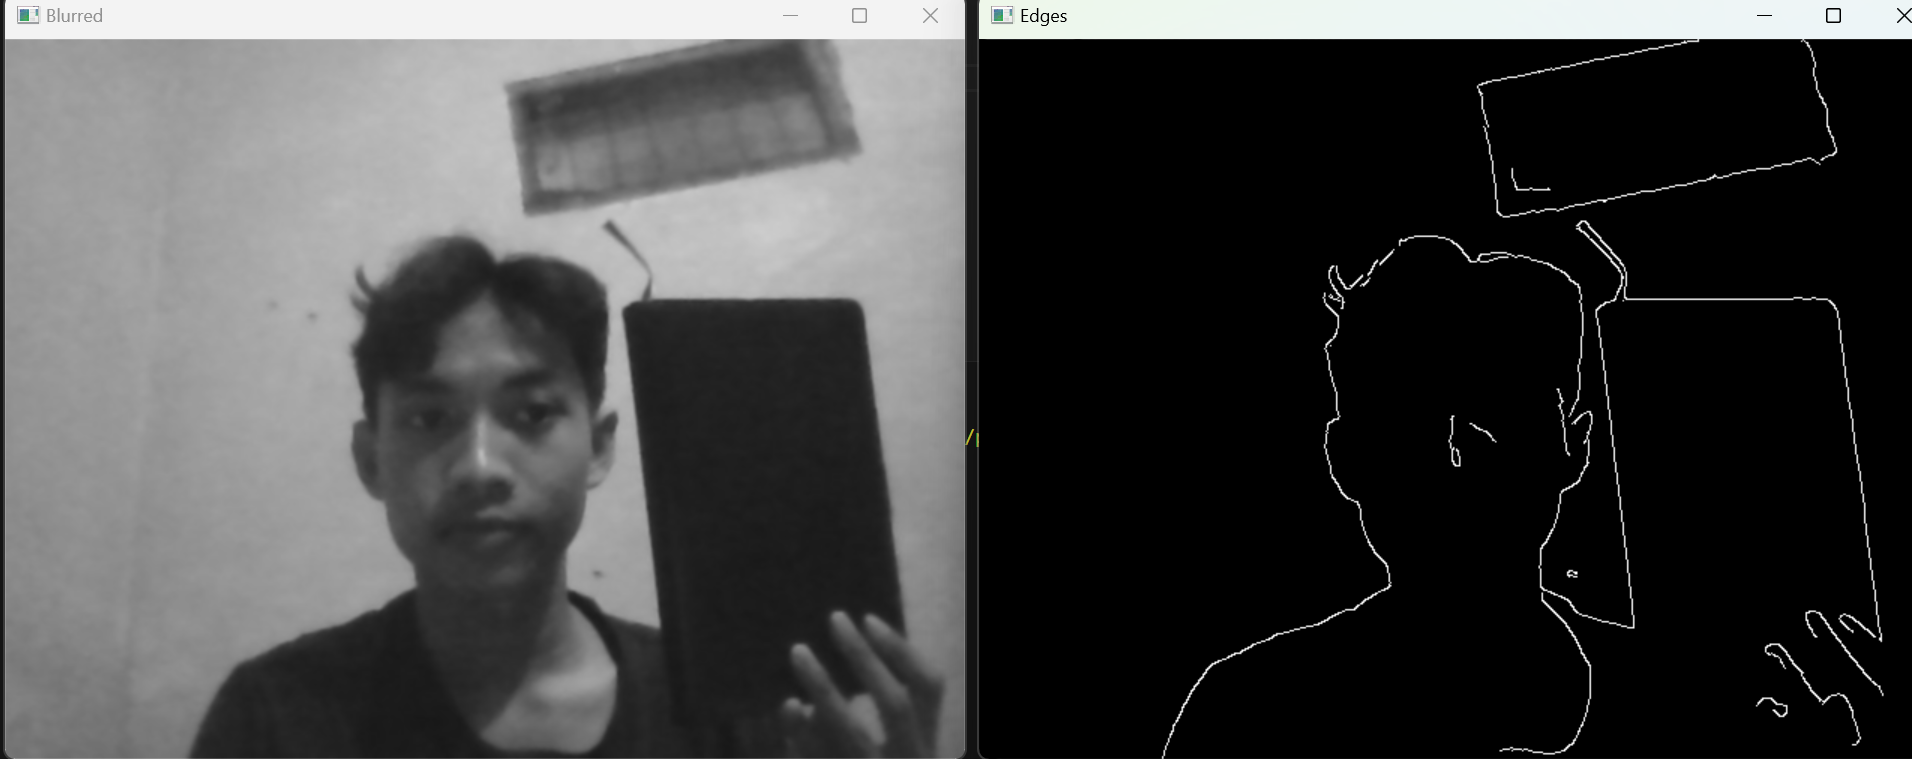



### **Multiple Color Detection in Real-Time using Python-OpenCV**

Step 1:
</br>
Input: Tangkap video melalui webcam.
</br>
Step 2:
</br>
Baca aliran video dalam frame gambar.
</br>
Step 3:
</br>
Konversi imageFrame dalam ruang warna BGR (ruang warna RGB direpresentasikan sebagai tiga matriks merah, hijau, dan biru dengan nilai integer dari 0 hingga 255) ke ruang warna HSV (hue-saturation-value).
Hue menggambarkan warna dalam hal saturasi, mewakili jumlah warna abu-abu dalam warna tersebut dan nilai menggambarkan kecerahan atau intensitas warna. Ini dapat direpresentasikan sebagai tiga matriks dalam rentang 0-179, 0-255, dan 0-255 masing-masing.
</br>
Step 4:
</br>
Tentukan rentang setiap warna dan buat masker yang sesuai.
</br>
Step 5:
</br>
Transformasi Morfologi: Dilasi, untuk menghapus noise dari gambar.
</br>
Step 6:
</br>
Dilakukan bitwise_and antara frame gambar dan masker untuk mendeteksi secara khusus warna tertentu dan membuang yang lain.
</br>
Step 7:
</br>
Buat kontur untuk warna-warna individual untuk menampilkan wilayah berwarna yang terdeteksi secara jelas.
</br>
Step 8:
</br>
Output: Deteksi warna secara real-time.

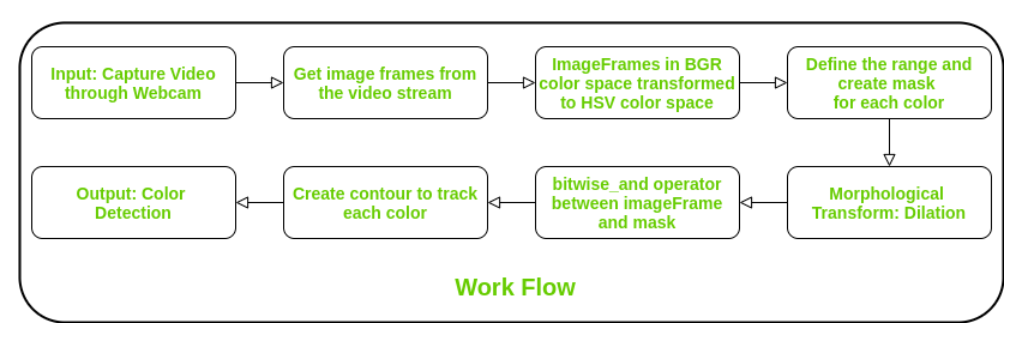

In [ ]:
import numpy as np
import cv2

# Capturing video through webcam
webcam = cv2.VideoCapture(0)

# Start a while loop
while True:

    # Reading the video from the webcam in image frames
    _, imageFrame = webcam.read()

    # Convert the imageFrame to HSV color space
    hsvFrame = cv2.cvtColor(imageFrame, cv2.COLOR_BGR2HSV)

    # Set range for red color and define mask
    red_lower = np.array([136, 87, 111], np.uint8)
    red_upper = np.array([180, 255, 255], np.uint8)
    red_mask = cv2.inRange(hsvFrame, red_lower, red_upper)

    # Set range for green color and define mask
    green_lower = np.array([25, 52, 72], np.uint8)
    green_upper = np.array([102, 255, 255], np.uint8)
    green_mask = cv2.inRange(hsvFrame, green_lower, green_upper)

    # Set range for blue color and define mask
    blue_lower = np.array([94, 80, 2], np.uint8)
    blue_upper = np.array([120, 255, 255], np.uint8)
    blue_mask = cv2.inRange(hsvFrame, blue_lower, blue_upper)

    # Set range for yellow color and define mask
    yellow_lower = np.array([20, 100, 100], np.uint8)
    yellow_upper = np.array([30, 255, 255], np.uint8)
    yellow_mask = cv2.inRange(hsvFrame, yellow_lower, yellow_upper)

    # Set range for white color and define mask
    white_lower = np.array([0, 0, 180], np.uint8)
    white_upper = np.array([180, 25, 255], np.uint8)
    white_mask = cv2.inRange(hsvFrame, white_lower, white_upper)

    # Set range for black color and define mask
    black_lower = np.array([0, 0, 0], np.uint8)
    black_upper = np.array([180, 255, 30], np.uint8)
    black_mask = cv2.inRange(hsvFrame, black_lower, black_upper)

    # Set range for orange color and define mask
    orange_lower = np.array([5, 50, 50], np.uint8)
    orange_upper = np.array([15, 255, 255], np.uint8)
    orange_mask = cv2.inRange(hsvFrame, orange_lower, orange_upper)

    # Set range for purple color and define mask
    purple_lower = np.array([125, 50, 50], np.uint8)
    purple_upper = np.array([145, 255, 255], np.uint8)
    purple_mask = cv2.inRange(hsvFrame, purple_lower, purple_upper)

    # Set range for brown color and define mask
    brown_lower = np.array([10, 50, 20], np.uint8)
    brown_upper = np.array([20, 255, 200], np.uint8)
    brown_mask = cv2.inRange(hsvFrame, brown_lower, brown_upper)

    # Morphological Transform, Dilation
    # for each color and bitwise_and operator
    # between imageFrame and mask determines
    # to detect only that particular color
    kernel = np.ones((5, 5), "uint8")

    # Dilate each color mask
    red_mask = cv2.dilate(red_mask, kernel)
    green_mask = cv2.dilate(green_mask, kernel)
    blue_mask = cv2.dilate(blue_mask, kernel)
    yellow_mask = cv2.dilate(yellow_mask, kernel)
    white_mask = cv2.dilate(white_mask, kernel)
    black_mask = cv2.dilate(black_mask, kernel)
    orange_mask = cv2.dilate(orange_mask, kernel)
    purple_mask = cv2.dilate(purple_mask, kernel)
    brown_mask = cv2.dilate(brown_mask, kernel)

    # Bitwise AND operation between each color mask and the original image frame
    res_red = cv2.bitwise_and(imageFrame, imageFrame, mask = red_mask)
    res_green = cv2.bitwise_and(imageFrame, imageFrame, mask = green_mask)
    res_blue = cv2.bitwise_and(imageFrame, imageFrame, mask = blue_mask)
    res_yellow = cv2.bitwise_and(imageFrame, imageFrame, mask = yellow_mask)
    res_white = cv2.bitwise_and(imageFrame, imageFrame, mask = white_mask)
    res_black = cv2.bitwise_and(imageFrame, imageFrame, mask = black_mask)
    res_orange = cv2.bitwise_and(imageFrame, imageFrame, mask = orange_mask)
    res_purple = cv2.bitwise_and(imageFrame, imageFrame, mask = purple_mask)
    res_brown = cv2.bitwise_and(imageFrame, imageFrame, mask = brown_mask)

    # Creating contour to track red color
    contours, hierarchy = cv2.findContours(red_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 300:
            x, y, w, h = cv2.boundingRect(contour)
            imageFrame = cv2.rectangle(imageFrame, (x, y), (x + w, y + h), (0, 0, 255), 2)
            cv2.putText(imageFrame, "Red Colour", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255))

    # Creating contour to track green color
    contours, hierarchy = cv2.findContours(green_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 300:
            x, y, w, h = cv2.boundingRect(contour)
            imageFrame = cv2.rectangle(imageFrame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(imageFrame, "Green Colour", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0))

    # Creating contour to track blue color
    contours, hierarchy = cv2.findContours(blue_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 300:
            x, y, w, h = cv2.boundingRect(contour)
            imageFrame = cv2.rectangle(imageFrame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(imageFrame, "Blue Colour", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 0, 0))

    # Creating contour to track yellow color
    contours, hierarchy = cv2.findContours(yellow_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 300:
            x, y, w, h = cv2.boundingRect(contour)
            imageFrame = cv2.rectangle(imageFrame, (x, y), (x + w, y + h), (0, 255, 255), 2)
            cv2.putText(imageFrame, "Yellow Colour", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 255))

    # Creating contour to track white color
    contours, hierarchy = cv2.findContours(white_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 300:
            x, y, w, h = cv2.boundingRect(contour)
            imageFrame = cv2.rectangle(imageFrame, (x, y), (x + w, y + h), (255, 255, 255), 2)
            cv2.putText(imageFrame, "White Colour", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255))

    # Creating contour to track black color
    contours, hierarchy = cv2.findContours(black_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 300:
            x, y, w, h = cv2.boundingRect(contour)
            imageFrame = cv2.rectangle(imageFrame, (x, y), (x + w, y + h), (0, 0, 0), 2)
            cv2.putText(imageFrame, "Black Colour", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 0))

    # Creating contours to track each additional color
    contours, _ = cv2.findContours(orange_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 300:
            x, y, w, h = cv2.boundingRect(contour)
            imageFrame = cv2.rectangle(imageFrame, (x, y), (x + w, y + h), (0, 165, 255), 2)
            cv2.putText(imageFrame, "Orange", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 165, 255))

    contours, _ = cv2.findContours(purple_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 300:
            x, y, w, h = cv2.boundingRect(contour)
            imageFrame = cv2.rectangle(imageFrame, (x, y), (x + w, y + h), (128, 0, 128), 2)
            cv2.putText(imageFrame, "Purple", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (128, 0, 128))

    contours, _ = cv2.findContours(brown_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 300:
            x, y, w, h = cv2.boundingRect(contour)
            imageFrame = cv2.rectangle(imageFrame, (x, y), (x + w, y + h), (0, 51, 102), 2)
            cv2.putText(imageFrame, "Brown", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 51, 102))

    # Program Termination
    cv2.imshow("Multiple Color Detection in Real-Time", imageFrame)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Release resources
webcam.release()
cv2.destroyAllWindows()


Output :

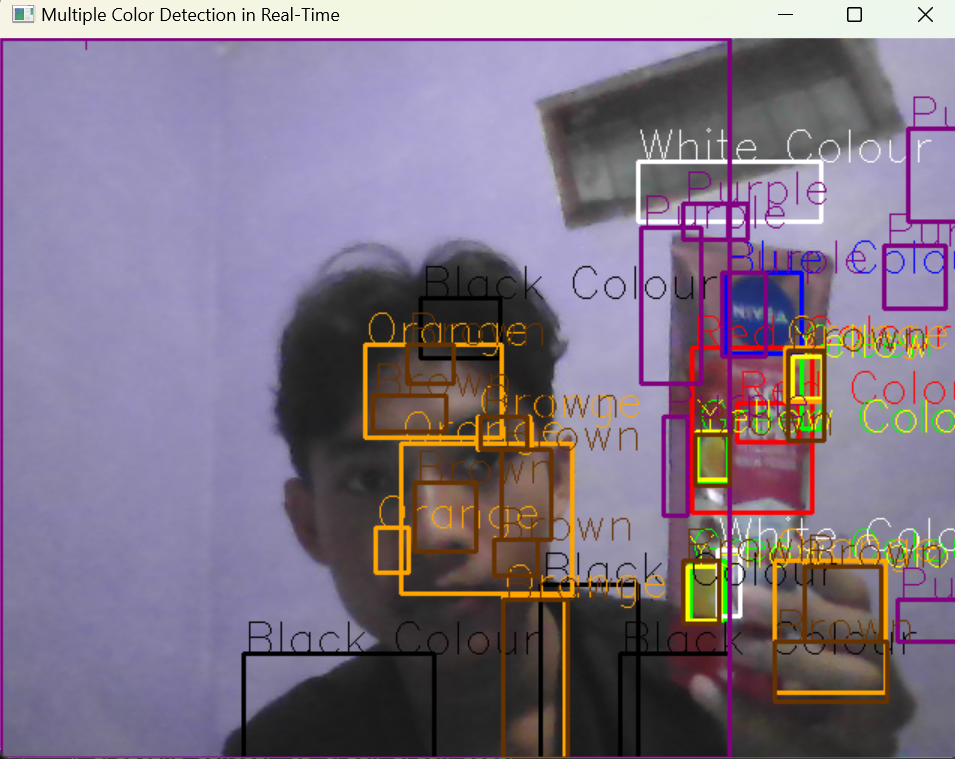